# Imports

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor,plot_tree

# Data Collection and Cleaning

In [62]:
ins_df= pd.read_csv('insurance.csv')
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
ins_df.shape

(1338, 7)

In [10]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
ins_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualization

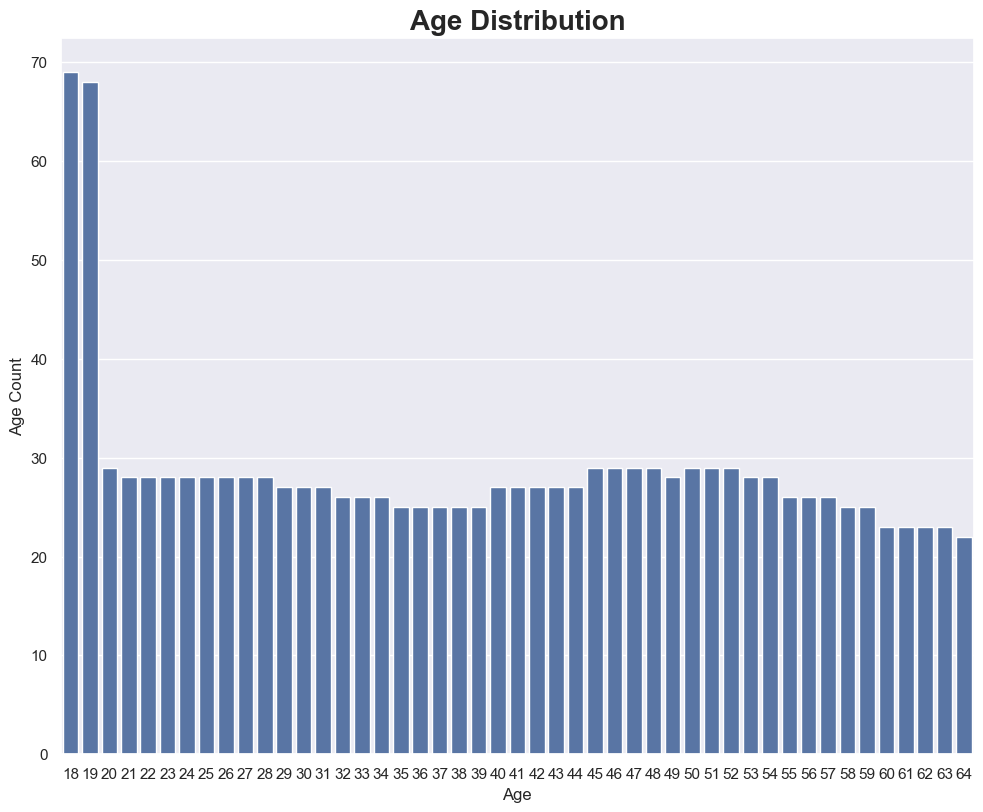

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [120]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(ins_df['age'].value_counts())
plt.tight_layout()
plt.title("Age Distribution",fontsize=20,fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Age Count')
plt.show()
ins_df['age'].value_counts()

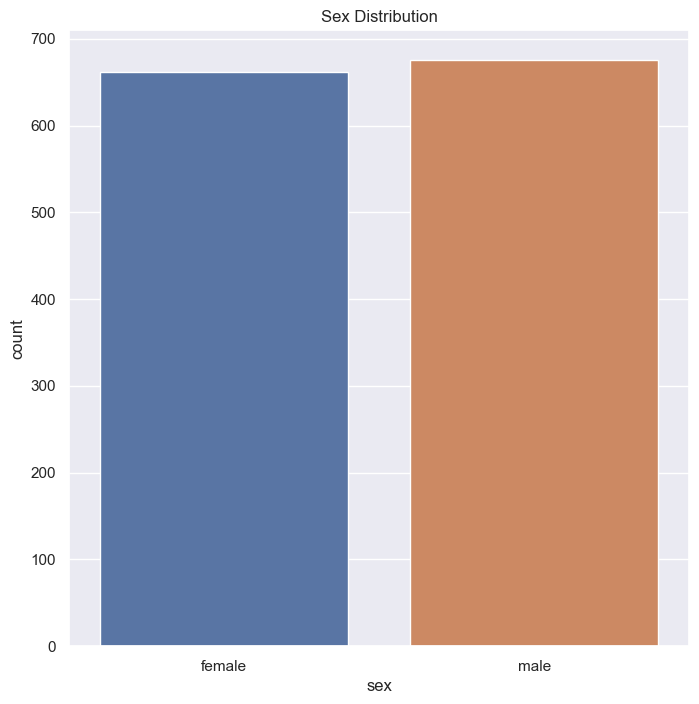

sex
male      676
female    662
Name: count, dtype: int64

In [122]:
plt.figure(figsize=(8,8))
sns.countplot(x=ins_df['sex'],hue=ins_df['sex'])
plt.title("Sex Distribution")
plt.show()
ins_df['sex'].value_counts()

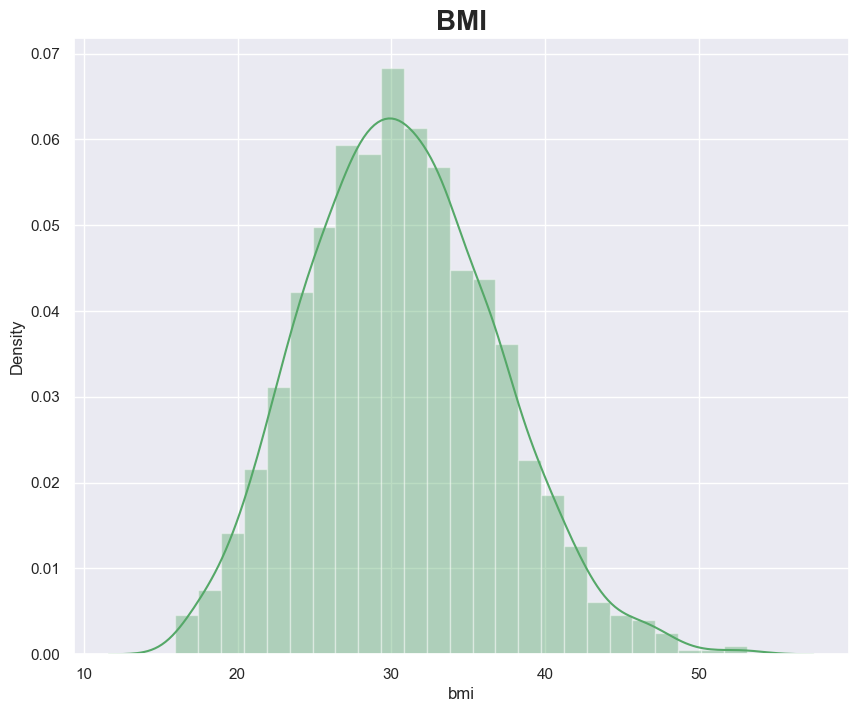

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [126]:
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(ins_df['bmi'],color='g')

plt.title("BMI",fontsize=20,fontweight='bold')

plt.show()
ins_df['bmi'].value_counts()

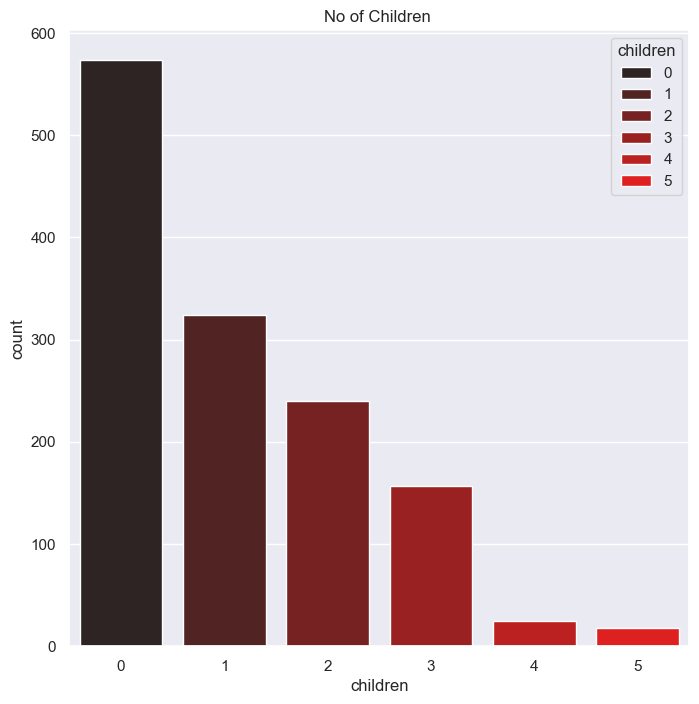

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [140]:
plt.figure(figsize=(8,8))
sns.countplot(x=ins_df['children'],hue='children', color='red',data=ins_df)
plt.title("No of Children ")
plt.show()
ins_df['children'].value_counts()

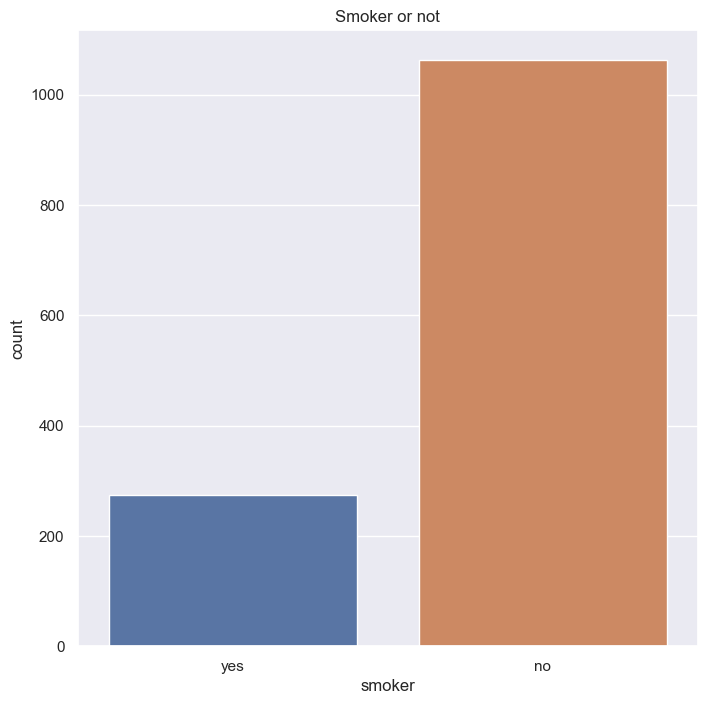

smoker
no     1064
yes     274
Name: count, dtype: int64

In [132]:
plt.figure(figsize=(8,8))
sns.countplot(x=ins_df['smoker'],hue=ins_df['smoker'])
plt.title("Smoker or not")
plt.show()
ins_df['smoker'].value_counts()

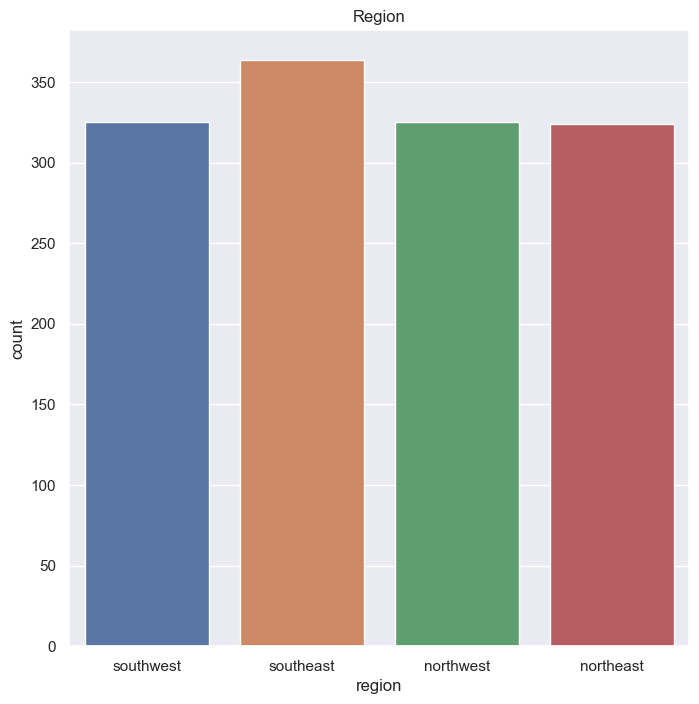

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [134]:
plt.figure(figsize=(8,8))
sns.countplot(x=ins_df['region'],hue=ins_df['region'])
plt.title("Region")
plt.show()
ins_df['region'].value_counts()

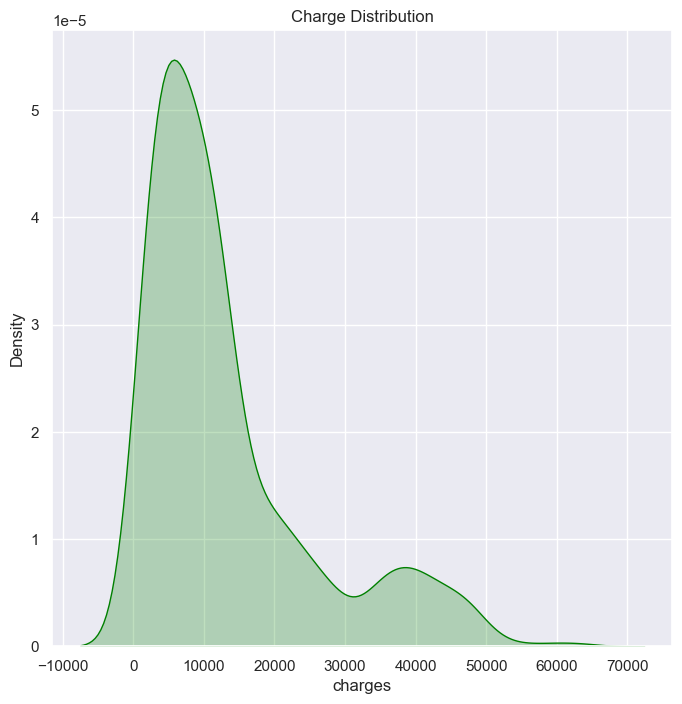

In [256]:
plt.figure(figsize=(8,8))
sns.kdeplot(x=ins_df['charges'],fill=True, color= 'green')
plt.title("Charge Distribution")
plt.show()


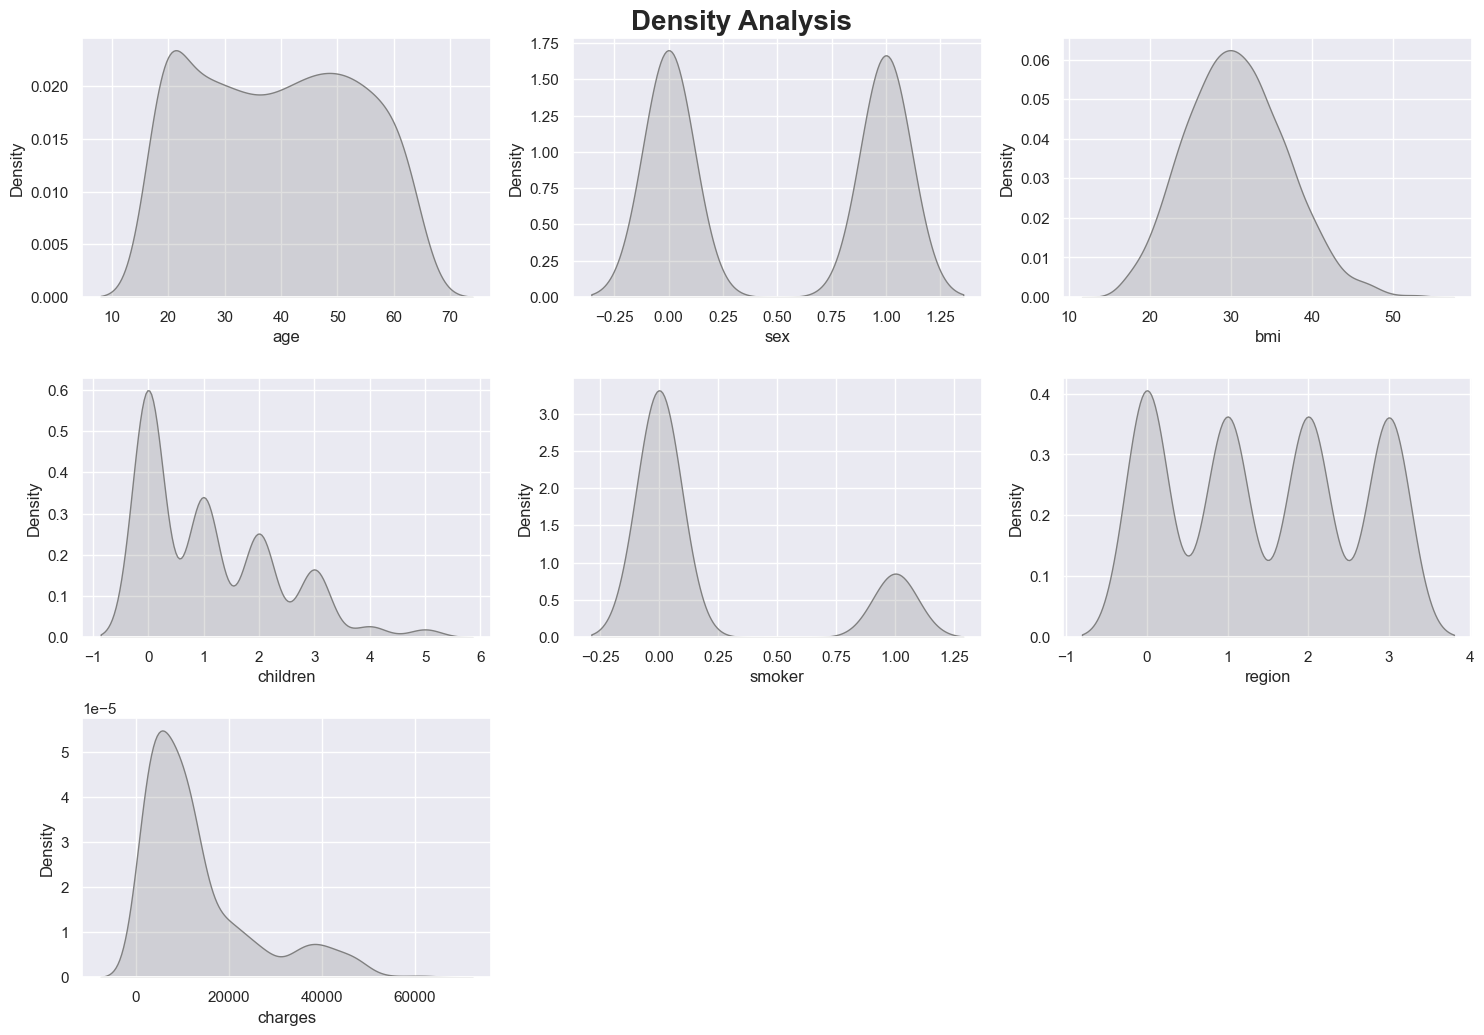

In [332]:
num_feature =[fea for fea in ins_df.columns if ins_df[fea].dtype != object]
plt.figure(figsize=(15,17))
plt.suptitle('Density Analysis',fontsize=20,fontweight='bold')
for i in range (0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=ins_df[num_feature[i]],fill=True,color='Grey') 
    plt.xlabel(num_feature[i])
    plt.tight_layout()

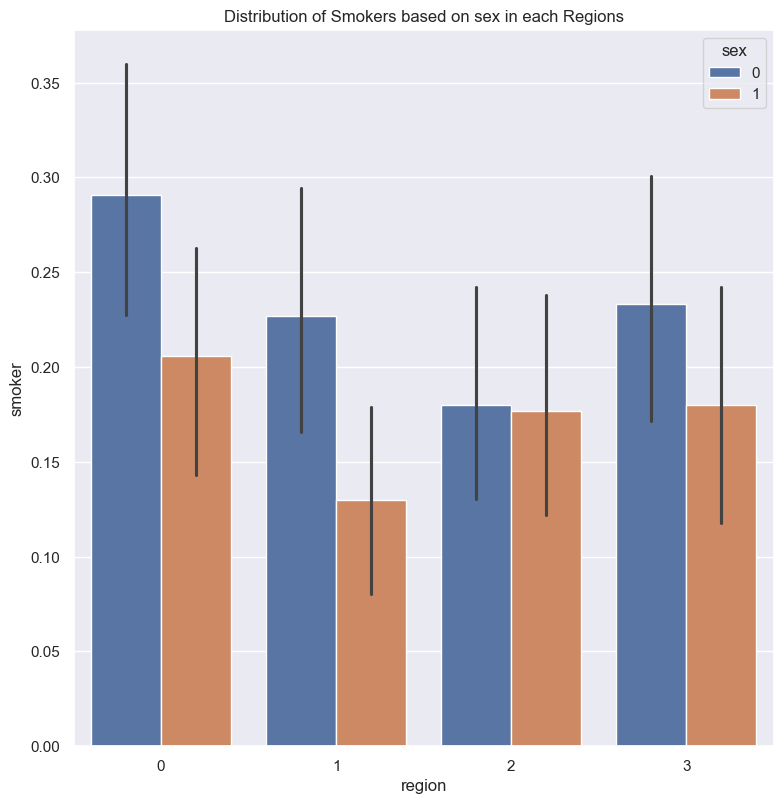

In [298]:
plt.figure(figsize=(8, 8))
sns.barplot(x='region',y='smoker',hue='sex',data=ins_df)
plt.tight_layout()
plt.title('Distribution of Smokers based on sex in each Regions')
plt.show()

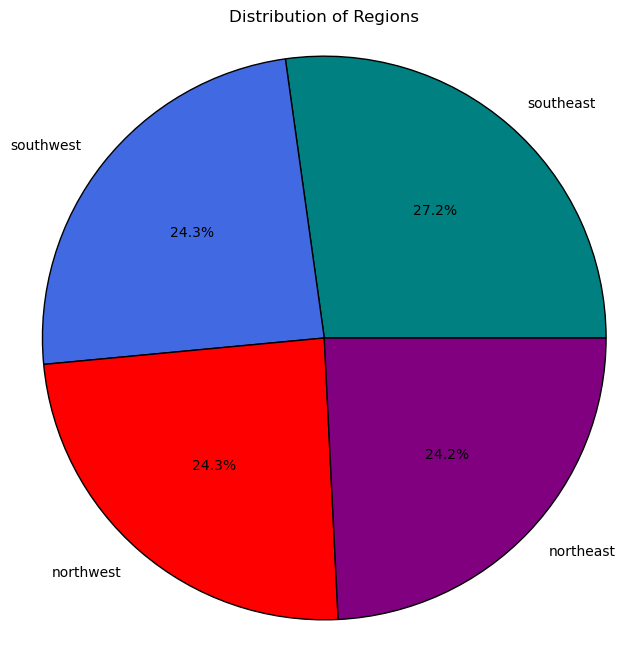

In [42]:
x= ins_df['region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(x, labels=x.index, autopct='%.1f%%', colors=['teal','royalblue','red','purple'],wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Regions')
plt.axis('equal')
plt.show()

# Building a Model

#Encoding the data

In [64]:
ins_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [66]:
ins_df['region'] = ins_df['region'].map({'southeast': 0, 'southwest': 1,'northwest' :2,'northeast' :3 })
ins_df['sex'] = ins_df['sex'].map({'male': 0, 'female': 1})
ins_df['smoker'] = ins_df['smoker'].map({'no': 0, 'yes': 1})
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


#Splitting the data

In [68]:
X=ins_df.drop(['charges'],axis=1)
y=ins_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [220]:
X_train.shape

(1070, 6)

#Applying Linear Regression

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (Linear Regression):", mse)
print("Mean Abosulte Error (Linear Regression):",mae)
print("R^2 Score (Linear Regression):", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 38228939.14400929
Mean Abosulte Error: 4260.502062366075
R^2 Score: 0.7454471618659975
Coefficients: [  251.0704662     35.0013672    334.72734446   583.45974613
 23927.87074635   288.86973349]
Intercept: -12802.0472328348


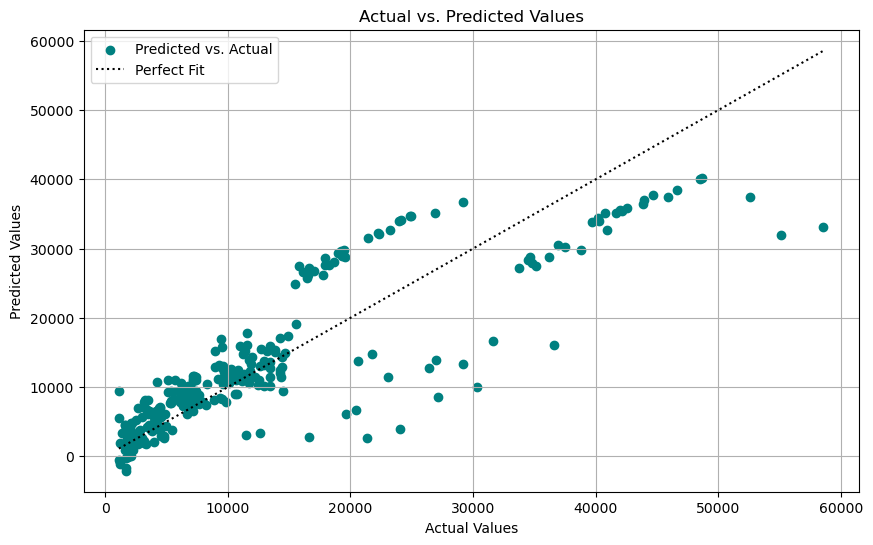

In [80]:
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_pred, color='teal', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle=':', label='Perfect Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Predicting Insuarance charges from Random Values with Linear Regression

In [82]:
data =(31,1,25.74,0,1,0)

arr= np.array(data)
arr_reshaped= arr.reshape(1,-1)
prediction = model.predict(arr_reshaped)
print('The Insurance Cost is ',prediction)

The Insurance Cost is  [27559.89117926]


#Applying Decision Tree Regressor

In [84]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_dt= tree_model.predict(X_test)
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt= mean_absolute_error(y_test,y_pred_dt)
print("Mean Squared Error:",mse_dt)
print("Mean Abosulte Error:",mae_dt)
print("R^2 Score:",r2_dt)

Mean Squared Error: 37701700.2227397
Mean Abosulte Error: 2856.039363686567
R^2 Score: 0.748957857344057


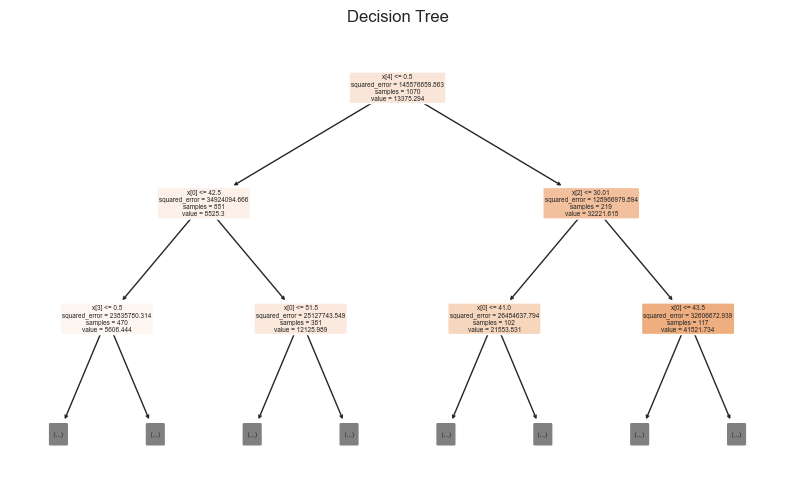

In [343]:
plt.figure(figsize=(10, 6))
plot_tree(tree_model, filled=True, rounded=True,max_depth=2)
plt.title("Decision Tree")
plt.show()

#Predicting Insuarance charges from Random Values with Decision Tree Regressor

In [359]:
data =(31,0,32.74,0,1,0)

arr= np.array(data)
arr_reshaped= arr.reshape(1,-1)
prediction = tree_model.predict(arr_reshaped)
print('The Insurance Cost is ', prediction)

The Insurance Cost is  [37079.372]


In [86]:
print("Mean Squared Error (Linear Regression):", mse)
print("Mean Abosulte Error (Linear Regression):",mae)
print("R^2 Score (Linear Regression):", r2)
print("Mean Squared Error (Decision Tree Regression):",mse_dt)
print("Mean Abosulte Error (Decision Tree Regression):",mae_dt)
print("R^2 Score (Decision Tree Regression):",r2_dt)

Mean Squared Error (Linear Regression): 38228939.14400929
Mean Abosulte Error (Linear Regression): 4260.502062366075
R^2 Score (Linear Regression): 0.7454471618659975
Mean Squared Error (Decision Tree Regression): 37701700.2227397
Mean Abosulte Error (Decision Tree Regression): 2856.039363686567
R^2 Score (Decision Tree Regression): 0.748957857344057
